In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
class TimeSeriesData():
    def __init__(self,x_min,x_max,num_of_points):
        self.x_min = x_min
        self.x_max = x_max
        self.num_of_points = num_of_points
        self.resolution = (x_max-x_min)/num_of_points
        self.x_data = np.linspace(x_min,x_max,num_of_points)
        self.y_true = np.sin(self.x_data)
        
    def return_sin(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_input_ts=False):
        rand_start = np.random.rand(batch_size,1)
        ts_start = rand_start * (self.x_max-self.x_min-steps*self.resolution)# we have to subtract steps*self.resolution bcoz if we get random value as 1 then also we have minimum 30 points(or steps) to go  
        input_ts_batch = ts_start + np.arange(0.0,steps+1)*self.resolution
        y_batch = np.sin(input_ts_batch)
        if return_input_ts:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1) , input_ts_batch
        else:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1) 
        

In [3]:
np.random.rand(1,1)*10

array([[3.02442206]])

In [4]:
ts = TimeSeriesData(0,10,250)
# print(ts.x_data)
# print(ts.y_true)

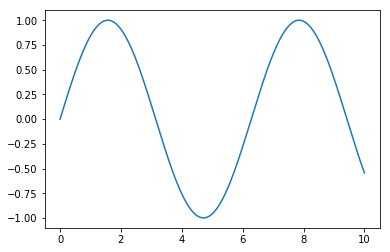

In [5]:
plt.plot(ts.x_data,ts.y_true)

In [6]:
steps=30
x,y,input_ts = ts.next_batch(1,steps,True)

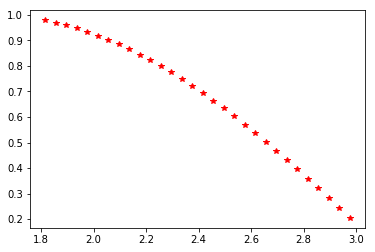

In [7]:
plt.plot(input_ts.flatten()[1:],x.flatten(),'r*')
# plt.plot(input_ts.flatten()[1:],y.flatten(),'y*',markersize=3)

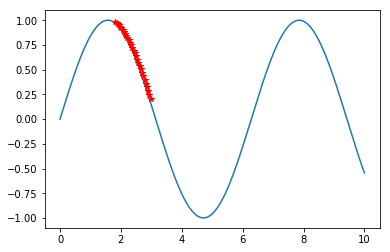

In [8]:
plt.plot(ts.x_data,ts.y_true)
plt.plot(input_ts.flatten()[1:],x.flatten(),'r*',)

In [9]:
# training instance

traininng_data = np.linspace(5,5+(ts.resolution * steps+1),steps+1)
traininng_data

array([5.        , 5.07333333, 5.14666667, 5.22      , 5.29333333,
       5.36666667, 5.44      , 5.51333333, 5.58666667, 5.66      ,
       5.73333333, 5.80666667, 5.88      , 5.95333333, 6.02666667,
       6.1       , 6.17333333, 6.24666667, 6.32      , 6.39333333,
       6.46666667, 6.54      , 6.61333333, 6.68666667, 6.76      ,
       6.83333333, 6.90666667, 6.98      , 7.05333333, 7.12666667,
       7.2       ])

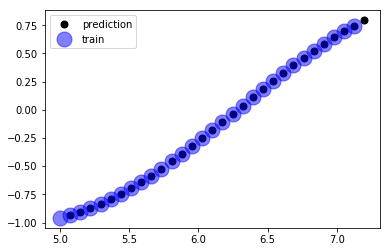

In [10]:
# plotting
plt.plot(traininng_data[1:],ts.return_sin(traininng_data[1:]),'ko',markersize=7,label='prediction')
plt.plot(traininng_data[:-1],ts.return_sin(traininng_data[:-1]),'bo',markersize=15,alpha=0.5,label='train')
plt.legend()

## Creating the model

In [11]:
num_inputs = 1
num_outputs = 1
learning_rate =0.001 
num_of_neurons = 100
num_of_iterations = 2000
batch_size = 1

In [12]:
#PLACEHOLDERS
x = tf.placeholder(tf.float32,[None,steps,num_inputs])
y_true = tf.placeholder(tf.float32,[None,steps,num_outputs])

In [13]:
#RNN CELL LAYER
cell = tf.contrib.rnn.BasicRNNCell(num_units=num_of_neurons,activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(cell,1)

outputs,states = tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)

W1012 09:46:23.643051  4552 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1012 09:46:23.648049  4552 deprecation.py:323] From <ipython-input-13-e20b27050bcd>:2: BasicRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
W1012 09:46:23.648049  4552 deprecation.py:323] From <ipython-input-13-e20b27050bcd>:5: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(ce

In [14]:
loss = tf.reduce_mean(tf.square(outputs-y_true))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [15]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [16]:
sess = tf.InteractiveSession()
sess.run(init)

In [17]:
for i in range(num_of_iterations):
    x_batch,y_batch = ts.next_batch(batch_size,steps)
    sess.run(optimizer,feed_dict={x:x_batch,y_true:y_batch})
    if i%100==0:
        mse = loss.eval(feed_dict={x:x_batch,y_true:y_batch})
        print('On step ',i,' loss is ',mse)
saver.save(sess,'./rnn_timeseries_model')        

On step  0  loss is  0.30032572
On step  100  loss is  0.002780532
On step  200  loss is  0.0053374637
On step  300  loss is  0.0011432454
On step  400  loss is  4.95592e-05
On step  500  loss is  0.0006572781
On step  600  loss is  7.932113e-05
On step  700  loss is  0.00035722507
On step  800  loss is  5.811469e-05
On step  900  loss is  5.519969e-05
On step  1000  loss is  9.086518e-05
On step  1100  loss is  0.00029159914
On step  1200  loss is  7.229499e-05
On step  1300  loss is  0.0041968534
On step  1400  loss is  3.8615526e-05
On step  1500  loss is  0.00017628254
On step  1600  loss is  6.441222e-05
On step  1700  loss is  0.00067050353
On step  1800  loss is  6.456471e-05
On step  1900  loss is  4.892175e-05


'./rnn_timeseries_model'

In [18]:
saver.restore(sess,'./rnn_timeseries_model')

X_test = np.sin(traininng_data[:-1].reshape(-1,steps,num_inputs))
y_pred = sess.run(outputs,feed_dict={x:X_test})

W1012 09:46:32.800355  4552 deprecation.py:323] From C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


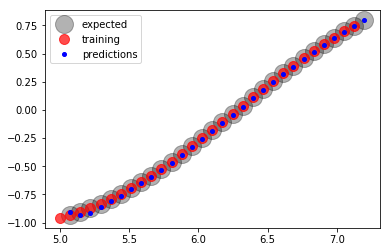

In [19]:
#plotting

plt.plot(traininng_data[1:],np.sin(traininng_data[1:]),'ko',alpha=0.3,markersize=18,label='expected')
plt.plot(traininng_data[:-1],np.sin(traininng_data[:-1]),'ro',alpha=0.7,markersize=10,label='training')
plt.plot(traininng_data[1:],y_pred.flatten(),'b.',markersize=8,label='predictions')
plt.legend()

## Creating the new time series with the help of a seed

In [69]:
saver.restore(sess,'./rnn_timeseries_model')
zero_seq_seed = [0.0 for i in range(steps)]
for i in range(len(ts.x_data)-steps):
    x_batch = np.array(zero_seq_seed[-steps:]).reshape(1,steps,1)
    y_pred = sess.run(outputs,feed_dict={x:x_batch})
    zero_seq_seed.append(y_pred[0,-1,0])    

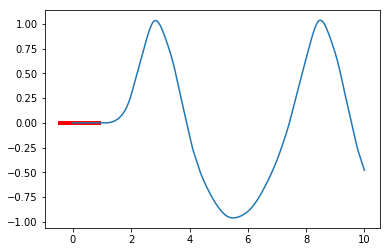

In [64]:
plt.plot(x_batch.flatten(),zero_seq_seed[:steps],'r',linewidth=4)
plt.plot(ts.x_data,zero_seq_seed)

In [79]:
saver.restore(sess,'./rnn_timeseries_model')
traininng_inst = list(ts.y_true[:30])
for i in range(len(traininng_inst)-steps):
    x_batch = np.array(traininng_inst[-steps:]).reshape(1,steps,1)
    y_pred = sess.run(outputs,feed_dict={x:x_batch})
    traininng_inst.append(y_pred[0,-1,0])    

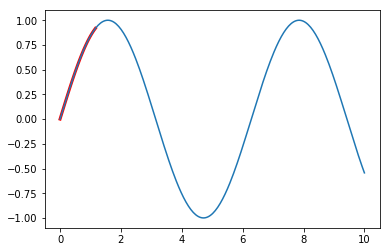

In [83]:
plt.plot(ts.x_data[:steps],traininng_inst[:steps],'r',linewidth=3)
plt.plot(ts.x_data,ts.y_true)